In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

from structures import Value, Neuron, Layer, MLP
from visualization_functions import *
from others_functions import *

In [42]:
# Structuration
mlp = MLP(3, [10, 10, 1]) # 3 inputs, 2 hidden layers with 4 neurons each, and 1 output

In [43]:
# Training set
xs = [
    [2.0, 3.0, -1],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]

In [44]:

def grad_descent(n, xs, ys, h, epsilon):
    n.reset_grad()
    ypred = [mlp(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
    loss.backward()
    for n in mlp.parameters():
        n.data -= h * n.grad
    if loss.data < epsilon:
        return True, loss, ypred
    return False, loss, ypred

max_iter = 1000
is_finised = False
epsilon = 0.001
h = 1
while max_iter > 0 and not is_finised:
    max_iter -= 1
    is_finised, loss, ypred = grad_descent(mlp, xs, ys, h, epsilon)
    print(f"{max_iter}, Loss: {loss.data:.4f}, {ypred}")
    h = max(0.001, h*0.95)
        






999, Loss: 3.8204, [Value(data=0.9282193651350669), Value(data=-0.5509725630494768), Value(data=0.88823980252935), Value(data=0.7805547478329036)]
998, Loss: 7.8356, [Value(data=-0.976294068042799), Value(data=-0.9999988401992461), Value(data=-0.9999945636367951), Value(data=-0.982399227375785)]
997, Loss: 0.2781, [Value(data=0.9803971228930883), Value(data=-0.9995553774666318), Value(data=-0.47320072654156853), Value(data=0.9857079140778328)]
996, Loss: 7.9125, [Value(data=-0.9996417820467066), Value(data=-0.9999973302631439), Value(data=-0.9999989693390562), Value(data=-0.9783562492753252)]
995, Loss: 0.0473, [Value(data=0.7825374563425559), Value(data=-0.999993375047068), Value(data=-0.9999988120144088), Value(data=0.9992614529197187)]
994, Loss: 0.0000, [Value(data=0.9999883684155272), Value(data=-0.9999929411055117), Value(data=-0.9999977232981205), Value(data=0.9998871127151825)]


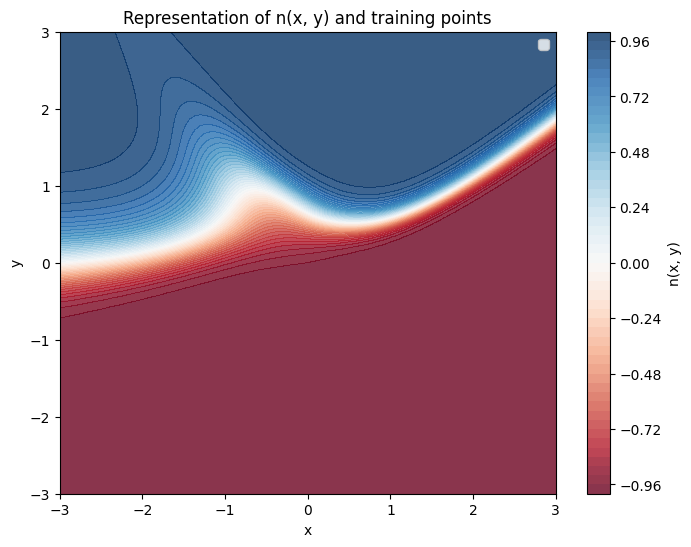

In [ ]:
# Create a grid of points for visualization

x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.array([[mlp([x, y, 0]).data for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

# Plot the decision boundary and points
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap="RdBu", alpha=0.8)
plt.colorbar(label="n(x, y)")

# Plot the training points
#for i, (x, y) in enumerate(xs):
    #plt.scatter(x, y, c="white" if ys[i] > 0 else "black", edgecolor="k", s=100, label=f"ys={ys[i]}" if i == 0 else "")

plt.title("Representation of n(x, y) and training points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["ys=1.0", "ys=-1.0"], loc="upper right")
plt.show()


